Pandas is an API

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width="800," align="center" alt="logistic regression block diagram">


Rest APIs function by sending a request, the request is communicated via HTTP message. The HTTP message usually contains a JSON file.

The information can be stored locally in the API.

Below is example of download the dataframe from the API call for Golden State and run the rest like a video.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [58]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [59]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

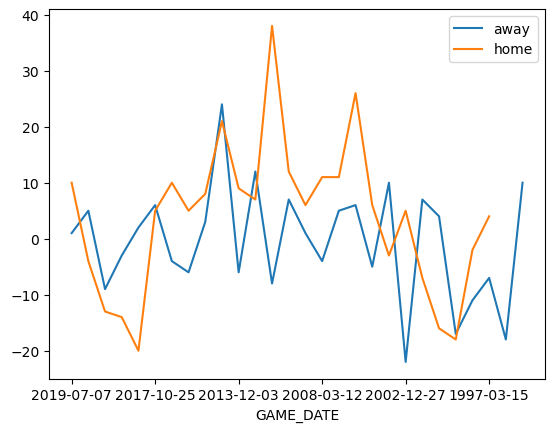

In [60]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

#HTTP and Requests

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/reqest_basics.png" width="750" align="center">

</div>


##URL

URL into three parts.

<ul>
    <li><b>Scheme</b>:- This is this protocol, for this lab it will always be <code>http://</code>  </li>
    <li><b> Internet address or  Base URL </b>:- This will be used to find the location here are some examples: <code>www.ibm.com</code> and  <code> www.gitlab.com </code> </li>
    <li><b>Route</b>:- Location on the web server for example: <code>/images/IDSNlogo.png</code> </li>
</ul>


##Requests

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/reqest_messege.png" width="400" align="center">
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/http_methods.png" width="400" align="center">
</div>


##Response

###Status Code

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/status_code.png" width="300" align="center">
</div>


##Requests in Python

Requests is a Python Library that allows you to send HTTP/1.1 requests easily.

In [61]:
import requests

In [62]:
import os             #(Operating System) module
from PIL import Image #Python Imaging Library (now known as Pillow) #Image is a core class in PIL for opening, manipulating, and saving image files
from IPython.display import IFrame  #enhanced interactive Python shell  #display utility for showing embedded content in Jupyter notebooks, for Display a webpage

In [63]:
url='https://www.ibm.com/'
r=requests.get(url)

In [64]:
r.status_code

200

View request headers.

In [65]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=638F7E41D1B56A379540AA5227D480DB~-1~YAAQXZ42Fw9JLfOYAQAAiC41MQ5CWezrkK5mElj6PSQpHFaOK0oDDv0Y0vUi4LbGkGFa47n7jP4+icrfzqsigTmZO1pq65Ax63pB9O5Kq6zKUFPrpPbDhodPgfwkRUxK68uCUezXlWpKZIJrPsmt/4h5TBo5mhjDfag3VqnP2QsZhEHhO4ma4v42MkbNf4hsq4SOeA4Cm1umoDtlOKbNSaTNJCjhw6bd0HfynLut8TympdlJorUHh+D1dAluyGPnJZi6sBFqpBJBz+2WmAlG9QNNpw6AAg2GWMXvd6nikJVe1CnUY8gyCDUUTLDfbz127sBl4+h+NcxXPt3P2sM+Ju3+Jljr0dCOlesA0N2/RGvfNLwOK99hgN83GG4R+o0EdP3P1uGArbH+RmJQL85Gi7I1G7opmzwfgAfwEVzH3XAH7mjGR4o+d6L93qo/TYp5mnY=~-1~-1~-1~-1~-1; bm_sz=5910676B7AC80DD3FD041207D31E3D50~YAAQXZ42FxBJLfOYAQAAiC41MR1cvx+yBR6ouliSLdkRNUlqSw9gMwHC+yuPEdeQiQUGzYe3AycbIusy9Gx8ByRJOkwrrZb7jT1FbQYKtGtDXi4eQegXyCipDojzUqw4iFSqJm8m+WNOG6zjvv0iynEUGNLwnr+kWPNxNee9DwOZPTVMoyvy7uyjYXhSQWVHHYifEjJwRLF9PC1A7mSSpVA5mvPTNvMUaMW/dcCnwXUrEwSupS5iprEb7tf5OzeYx1acB1EkZp4rljGxsgXxuNRrdVrRCt4B0FhpXgXRj/I2HkiBjxm

In [66]:
print("request body:", r.request.body)  #View request body

request body: None


In [67]:
header=r.headers
print(r.headers)

{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Wed, 10 Sep 2025 01:02:00 GMT', 'ETag': 'W/"2e6e0-63e67f7d31a02-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Wed, 10 Sep 2025 01:29:53 GMT', 'X-Akamai-Transformed': '0 - 0 -', 'Content-Encoding': 'gzip', 'Date': 'Wed, 10 Sep 2025 01:19:53 GMT', 'Content-Length': '37146', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}


In [68]:
print(header['Date'])
print(header['Content-Type'])

Wed, 10 Sep 2025 01:19:53 GMT
text/html;charset=utf-8


In [69]:
 r.encoding #check encoding

'utf-8'

In [70]:
r.text[0:100] #Snippet of first 100 characters

'\n<!DOCTYPE HTML>\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n      \r\n    \r\n  '

In [71]:
#make a get request
r=requests.get(url)

In [72]:
#see response header
print(r.headers)

{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Wed, 10 Sep 2025 01:02:00 GMT', 'ETag': 'W/"2e6e0-63e67f7d31a02-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Wed, 10 Sep 2025 01:29:53 GMT', 'X-Akamai-Transformed': '0 - 0 -', 'Content-Encoding': 'gzip', 'Date': 'Wed, 10 Sep 2025 01:19:53 GMT', 'Content-Length': '37146', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}


In [73]:
r.headers['Content-Type'] #One of the response header

'text/html;charset=utf-8'

An image is a response object that contains the image as a bytes-like object. So must save it using a file object. First, specify the file path and name.

In [74]:
path=os.path.join(os.getcwd(),'image.png')

- os.getcwd() gets the current directory
- os.path.join() creates a platform-independent file path

- Windows uses backslash \
- macOS and Linux use forward slash /

Save the file, in order to access the body of the response, use the attribute content then save it using the open function and write method:

In [75]:
with open(path,'wb') as f:
    f.write(r.content)

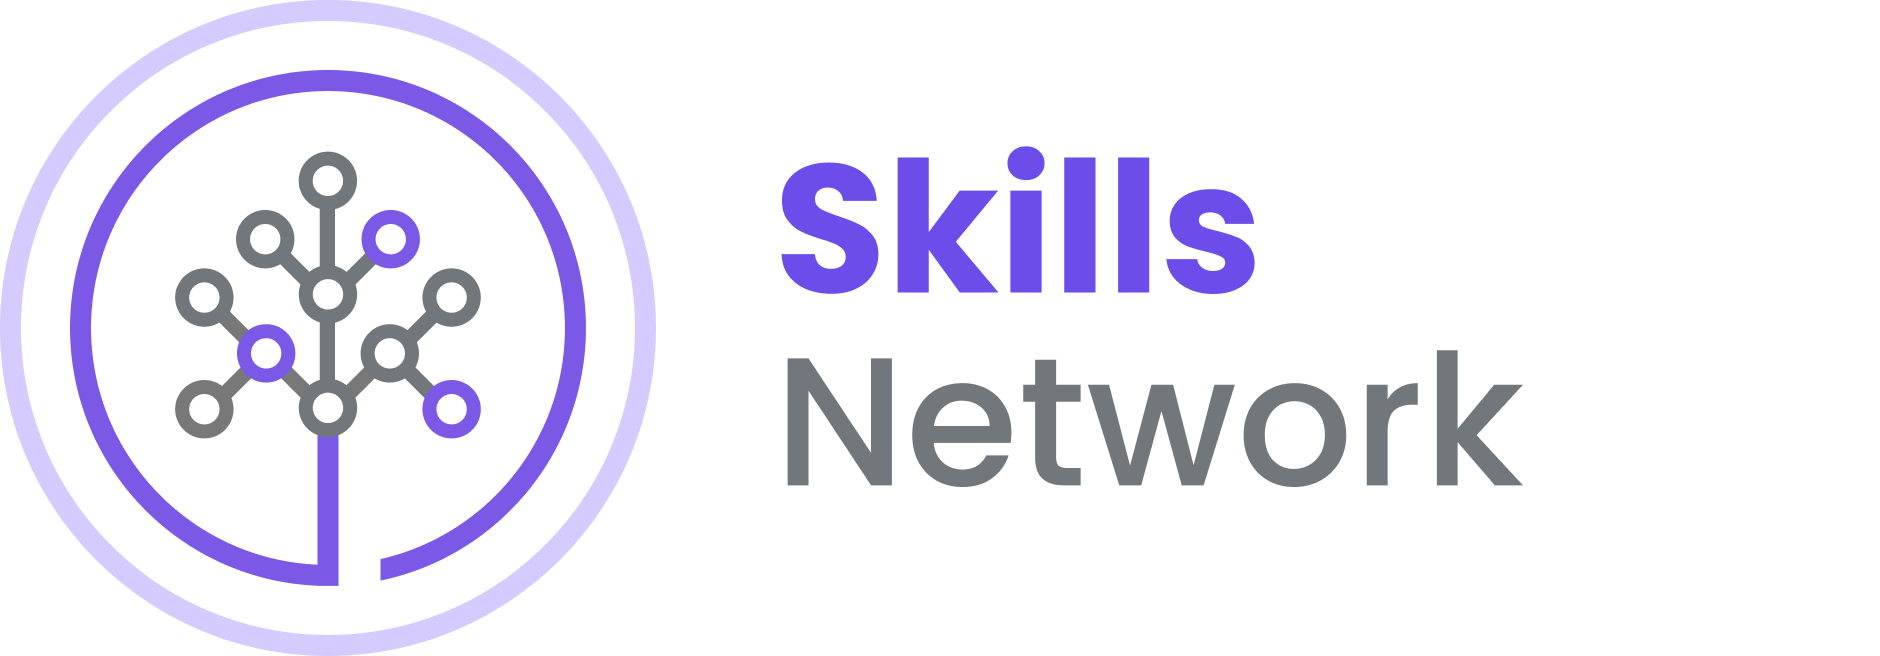

In [77]:
#view image
Image.open(path)

###Get Request with URL Parameters

Base URL is for http://httpbin.org/

url_get='http://httpbin.org/get'

In [81]:
url_get='http://httpbin.org/get'

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/query_string.png" width="500" align="center">
</div>


Create a Query string, add a dictionary, keys are the parameter names, values are the value of the Query string

In [82]:
payload={"name":"Joseph","ID":"123"}

In [83]:
#passing the dictionary payload to the params parameter of the  get() function:
r=requests.get(url_get,params=payload)

In [84]:
#print out the URL and see the name and values
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [86]:
r.request.body  #no request body

In [87]:
r.status_code

200

In [88]:
r.text

'{\n  "args": {\n    "ID": "123", \n    "name": "Joseph"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate, br, zstd", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.32.3", \n    "X-Amzn-Trace-Id": "Root=1-68c0d2a3-376a11ff6bd532c4126037ef"\n  }, \n  "origin": "151.192.180.247", \n  "url": "http://httpbin.org/get?name=Joseph&ID=123"\n}\n'

In [89]:
#check the content type
r.headers['Content-Type']

'application/json'

Since is json type, we can use the method json(), it returns a Python dict.

In [90]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br, zstd',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-68c0d2a3-376a11ff6bd532c4126037ef'},
 'origin': '151.192.180.247',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

In [91]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

##Post Requests

In [92]:
url_post='http://httpbin.org/post'

In [93]:
r_post=requests.post(url_post,data=payload)

In [94]:
print("POST request URL:", r_post.url)

POST request URL: http://httpbin.org/post


In [95]:
print("POST request body:",r_post.request.body)
print("GET request body:",r.request.body)

POST request body: name=Joseph&ID=123
GET request body: None


In [96]:
r_post.json()['form']

{'ID': '123', 'name': 'Joseph'}